In [4]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
from scipy.fftpack import fft
from scipy.signal import find_peaks, hilbert
from tqdm import tqdm
import matplotlib.pyplot as plt
import pywt
import nolds
import pickle
# Define the FitzHugh-Nagumo model equations
def fitzhugh_nagumo_coupled(t, xy,alpha , w2, a, b, c, k1, k2):
    x, y , x1, y1= xy
    dxdt = alpha*(y + x - (x**3)/3 + (k1 + c*x1))
    dydt = -(1/alpha) * (w2*x - a + b*y)
    dx1dt = alpha*(y1 + x1 - (x1**3)/3 + (k2 + c*x))
    dy1dt = -(1/alpha) * (w2*x1 - a + b*y1)
    return [dxdt, dydt, dx1dt, dy1dt]

alpha = 3
a = 0.7
b = 0.8
w2 = 1
x0 = 0
y0 = 0
x10 = 0
y10 = 0
xy0=[x0, x10, y0, y10]

n =30
c_vals = np.linspace(-0.3,0,num=n)
k1_vals = np.array([-0.3 for i in range(n)])
k2_vals = np.linspace(-0.65,-0.9, num=n)
t_span = [0, 200]
t_eval = np.linspace(0,100,5000)

In [5]:

lyap_map_x1 = np.zeros((c_vals.shape[0], k1_vals.shape[0]))
lyap_map_x2 = np.zeros((c_vals.shape[0], k1_vals.shape[0]))
for i, c in enumerate(c_vals):
    for j, k2 in tqdm(enumerate(k2_vals)):
        k1 = k1_vals[len(k1_vals)-1-j] 
        sol = solve_ivp(fitzhugh_nagumo_coupled, t_span, xy0, args=(alpha,w2,a,b,c,k1,k2),t_eval=t_eval,dense_output=True,rtol=1e-8)

        s1 = sol.y[0]
        s2 = sol.y[2]
        
        #Apply hamming filter
        window = np.hamming(s1.shape[0])
        s1 = s1 * window 
        s2 = s2 * window
        
        #Calculate R index
        lyap_x1 = nolds.corr_dim(s1, emb_dim=10)
        lyap_x2 = nolds.corr_dim(s2, emb_dim=10)
        
        #Save to response map
        lyap_map_x1[i, j] = lyap_x1
        lyap_map_x2[i, j] = lyap_x2

30it [02:42,  5.43s/it]
30it [02:41,  5.38s/it]
30it [02:42,  5.41s/it]
30it [02:42,  5.41s/it]
30it [02:42,  5.42s/it]
30it [02:43,  5.44s/it]
30it [02:43,  5.46s/it]
30it [02:35,  5.17s/it]
30it [02:27,  4.91s/it]
30it [02:27,  4.92s/it]
30it [02:27,  4.91s/it]
30it [02:26,  4.89s/it]
30it [02:26,  4.88s/it]
30it [02:26,  4.89s/it]
30it [02:34,  5.14s/it]
30it [02:41,  5.40s/it]
30it [02:41,  5.37s/it]
30it [02:41,  5.39s/it]
30it [02:35,  5.19s/it]
30it [02:43,  5.45s/it]
30it [02:43,  5.44s/it]
30it [02:39,  5.31s/it]
30it [02:38,  5.28s/it]
30it [02:38,  5.28s/it]
30it [02:38,  5.28s/it]
30it [02:39,  5.31s/it]
30it [02:39,  5.32s/it]
30it [02:38,  5.28s/it]
30it [02:25,  4.84s/it]
30it [02:25,  4.84s/it]


In [6]:
with open("lyapmapx1.pkl", 'wb') as f:
    pickle.dump(lyap_map_x1, f)

with open("lyapmapx2.pkl", 'wb') as f:
    pickle.dump(lyap_map_x2, f)

In [7]:
lyap_map_x1

array([[1.00462039, 1.00302269, 1.0000049 , 0.99558897, 0.99044912,
        0.98506261, 0.97955635, 0.97419131, 0.96895127, 0.96398491,
        0.95936443, 0.95524417, 0.95142515, 0.94801304, 0.94460527,
        0.94114318, 0.93769189, 0.93386786, 0.92975541, 0.92499757,
        0.91960975, 0.91223771, 0.90271474, 0.89477426, 0.88817952,
        0.8826741 , 0.87812446, 0.87441891, 0.87104376, 0.86790875],
       [0.99360149, 1.00132384, 1.00524788, 1.00343711, 1.00241632,
        1.00054921, 0.99708367, 0.99226723, 0.98686391, 0.98129251,
        0.97562415, 0.97013778, 0.964963  , 0.96015616, 0.95577056,
        0.95178161, 0.94830012, 0.94492224, 0.94135521, 0.93786098,
        0.93409636, 0.92992967, 0.92502364, 0.91962914, 0.91168399,
        0.9021742 , 0.89430174, 0.88760584, 0.8818805 , 0.87710853],
       [0.97060357, 0.9751253 , 0.98005041, 0.98597911, 0.99346384,
        1.00122498, 1.00336946, 1.0013834 , 1.00030073, 0.99778983,
        0.99350664, 0.98819218, 0.982545  , 0.

30it [00:00, 154581.23it/s]


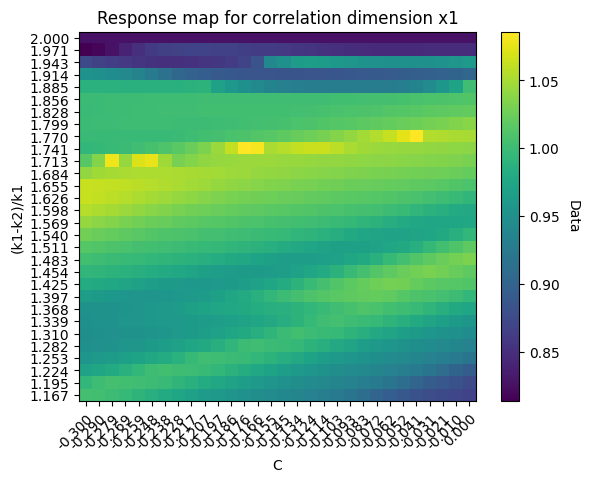

In [14]:
K = []
C = []
for i, c in tqdm(enumerate(c_vals)):
    C.append(c)
for j, k2 in enumerate(k2_vals):
    K.append((k2+0.3)/(-0.3))
        

# plt.imshow(Rmap, cmap='viridis', origin='lower', aspect='auto',)
fig, ax = plt.subplots()
im = ax.imshow(lyap_map_x1, cmap='viridis', origin='lower', aspect='auto',)

# Set tick labels
ax.set_xticks(np.arange(len(C)))
ax.set_yticks(np.arange(len(K)))
ax.set_xticklabels([f"{c:.3f}" for c in C])
ax.set_yticklabels([f"{k:.3f}" for k in K])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Data', rotation=-90, va="bottom")

# Add axis labels
ax.set_xlabel('C')
ax.set_ylabel('(k1-k2)/k1')
ax.set_title("Response map for correlation dimension x1")
# Show plot
plt.show()

30it [00:00, 197533.94it/s]


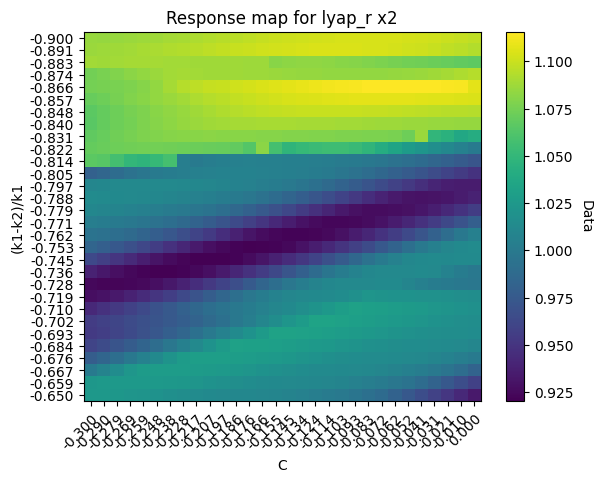

In [9]:
K = []
C = []
for i, c in tqdm(enumerate(c_vals)):
    C.append(c)
# for j, k2 in enumerate(k2_vals):
#     K.append((k2+0.3)/(-0.3))
for k2 in k2_vals:
    K.append(k2)

# plt.imshow(Rmap, cmap='viridis', origin='lower', aspect='auto',)
fig, ax = plt.subplots()
im = ax.imshow(lyap_map_x2, cmap='viridis', origin='lower', aspect='auto',)

# Set tick labels
ax.set_xticks(np.arange(len(C)))
ax.set_yticks(np.arange(len(K)))
ax.set_xticklabels([f"{c:.3f}" for c in C])
ax.set_yticklabels([f"{k:.3f}" for k in K])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Data', rotation=-90, va="bottom")

# Add axis labels
ax.set_xlabel('C')
ax.set_ylabel('(k1-k2)/k1')
ax.set_title("Response map for correlation dimension x2")
# Show plot
plt.show()

In [10]:
k1 = -0.3
k2 = -0.872
c = -0.200
# k1 = -0.3
# k2 = -0.68
# c = -0.3
sol = solve_ivp(fitzhugh_nagumo_coupled, t_span, xy0, args=(alpha,w2,a,b,c,k1,k2), t_eval=t_eval, dense_output=True,rtol=1e-8)
t = sol.t
s1 = sol.y[0]
s2 = sol.y[2]

In [11]:
nolds.lyap_r(s1)

/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.0018533649301170285

In [12]:
nolds.lyap_r(s2)

/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.0022231453343441072

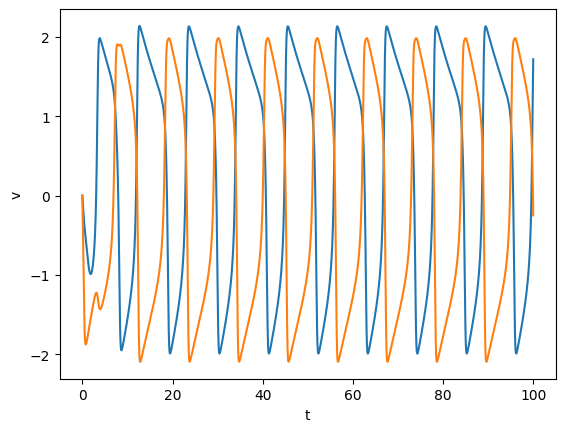

In [13]:
# plt.plot(t[0:100], (np.abs(np.fft.fft(v))**2)[0:100])
plt.plot(t, s1)
plt.plot(t, s2)
plt.xlabel('t')
plt.ylabel('v')
plt.show()